# Importacion y visualizacion info basica

In [ ]:
# Se importan todas las librerias que se va a utilizar

# Graficas
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Data analisys
import pandas as pd
import numpy as np

# Machine Learning
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

path_facu = '/content/drive/MyDrive/Colab_Notebooks/MachineLearning_BigData/spotify/Canciones_Spotify.csv' #Carpeta Facu
path_diego = '/content/drive/MyDrive/UPSO/Canciones_Spotify.csv'                                           #Carpeta Diego

df = pd.read_csv(path_diego)

df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [ ]:
#Empleo de clustering (no supervisado) para agrupar los datos por targets (gusta o no gusta la cancion)
#Empleo de clasificacionn (suupervisado) para clasificar segun las variables que gustan o no en base al target
#Cada vez que se agrega una cancion con sus respectivas variables, se debe predecir si una cancion encaja en el target 1 (gusta) o en el target 2 (no gusta)

## Definiciones



### Consignas

Claro, aquí tienes las consignas con un formato más prolijo e indentado:

1. **Selección de características óptimas:**

    - Identificar y seleccionar las características más relevantes para el entrenamiento de los modelos.

2. **Separación de datos:**

    - Dividir el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento de los modelos.

3. **Modelos de Machine Learning:**

    - Entrenar los siguientes modelos:
        - KNN (K-Nearest Neighbors)
        - SVM (Support Vector Machines)
        - Árbol de decisión
        - Bayes (Naive Bayes)
        - Otro modelo a elección.

4. **Validación:**

    - Realizar la validación utilizando:
        - Validación Simple
        - Validación Cruzada k-fold. [ Clase-10 min 59:00 ]

5. **Evaluación del rendimiento:**

    - Evaluar y analizar el rendimiento de cada modelo utilizando:
        - Matriz de confusión
        - Precisión, recall y F1-score.

6. **Ajuste de hiperparámetros:**

    - Ajustar los hiperparámetros de cada modelo utilizando:
        - Grid Search
        - Random Search.

7. **Ensamble de modelos:**

    - Realizar un ensamble de los modelos utilizando la técnica de Votación Mayoritaria.

8. **Evaluación del rendimiento del ensamble:**

    - Evaluar y analizar el rendimiento del ensamble utilizando:
        - Matriz de confusión
        - Precisión, recall y F1-score. [ Clase-10 1:00:00 Presicion macro-micro ]

### Variables



1. **Danceability (Bailabilidad)**
   - Rango de valores aceptados: 0.0 - 1.0
   - Implica: Describe qué tan adecuada es una pista para bailar. Una puntuación más alta indica una pista más bailable.

2. **Energy (Energía)**
   - Rango de valores aceptados: 0.0 - 1.0
   - Implica: Representa la intensidad y actividad percibida de una pista. Valores altos indican pistas más enérgicas.

3. **Loudness (Volumen)**
   - Rango de valores aceptados: Medido en decibeles (dB)
   - Implica: Es una medida de la sonoridad de una pista. Valores más altos indican pistas más ruidosas.

4. **Speechiness (Hablado)**
   - Rango de valores aceptados: 0.0 - 1.0
   - Implica: Indica la presencia de palabras habladas en una pista. Valores cercanos a 1.0 sugieren pistas predominantemente habladas.

5. **Acousticness (Acústica)**
   - Rango de valores aceptados: 0.0 - 1.0
   - Implica: Mide qué tan acústica es una pista. Una puntuación alta indica una pista más acústica.

6. **Instrumentalness (Instrumentalidad)**
   - Rango de valores aceptados: 0.0 - 1.0
   - Implica: Predice si una pista contiene o no voces. Valores cercanos a 1.0 indican pistas instrumentales.

7. **Liveness (En vivo)**
   - Rango de valores aceptados: 0.0 - 1.0
   - Implica: Detecta la presencia de una audiencia en la grabación. Valores altos sugieren una alta probabilidad de que la pista se haya tocado en vivo.

8. **Valence (Valencia)**
   - Rango de valores aceptados: 0.0 - 1.0
   - Implica: Describe la positividad musical de una pista. Valores altos indican pistas más positivas y alegres.

9. **Tempo**
   - Rango de valores aceptados: Medido en pulsos por minuto (BPM)
   - Implica: Es la velocidad o ritmo general de una pista. Indica cuán rápido o lento es el tempo de la música.

| Variable          | Descripción breve        | Rango de valores aceptables |
|-------------------|-------------------------|---------------------------|
| Danceability      | Adecuación para bailar   | 0.0 - 1.0                  |
| Energy            | Intensidad y actividad   | 0.0 - 1.0                  |
| Loudness          | Sonoridad                | Medido en dB               |
| Speechiness       | Presencia de hablado (1=hablado)    | 0.0 - 1.0                  |
| Acousticness      | Nivel de acústica (1=acustico)       | 0.0 - 1.0                  |
| Instrumentalness  | Contenido instrumental (1=instru)  | 0.0 - 1.0                  |
| Liveness          | Probabilidad de ser en vivo | 0.0 - 1.0               |
| Valence           | Positividad musical (1=alegre)     | 0.0 - 1.0                  |
| Tempo             | Velocidad o ritmo        | Medido en BPM              |


### Data basica

In [ ]:
df.head(10)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [ ]:
print("Forma del dataset")
print(df.shape)

n_samples, n_features = df.shape

print("Número de muestras del dataset")
print(n_samples)

print("Número de características del dataset")
print(n_features)

counts = np.bincount(df.target)

print("\nBalance de los datos:")
for i, count in enumerate(counts):
    print(f"{' -temaiken' if i == 1 else ' -no gusta'}: {count}")

Forma del dataset
(2017, 17)
Número de muestras del dataset
2017
Número de características del dataset
17

Balance de los datos:
 -no gusta: 997
 -temaiken: 1020


# KNN (K-Nearest Neighbors)

In [ ]:
# Separamos los datos en datos de fit, datos de prueba, targets de fit y targets de prueba
# Mitad de los datos para fit y mitad para test

# X= df[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']].to_numpy() TODOS LOS 13 ATRIBUTOS
# X= df[['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']].to_numpy()
X= df[['acousticness','danceability','energy','instrumentalness','loudness','speechiness']].to_numpy()
y= df[['target']].to_numpy()

X_train_knn, X_test_knn, y_train_knn, y_test_knn= train_test_split(X, y, test_size= 0.5, random_state=42)

In [ ]:
# Llamamos al objeto clasificador
# El k es 2
clasificadorKNN = KNeighborsClassifier(n_neighbors=2)
clasificadorKNN.fit(X_train_knn, y_train_knn.ravel())

# Con la function nos pasa el clasificador ya entrenado

def generate_clf_KNN(k, X_train_knn, y_train_knn):
    clasificadorKNN = KNeighborsClassifier(n_neighbors=k)
    clasificadorKNN.fit(X_train_knn, y_train_knn.ravel())
    return clasificadorKNN

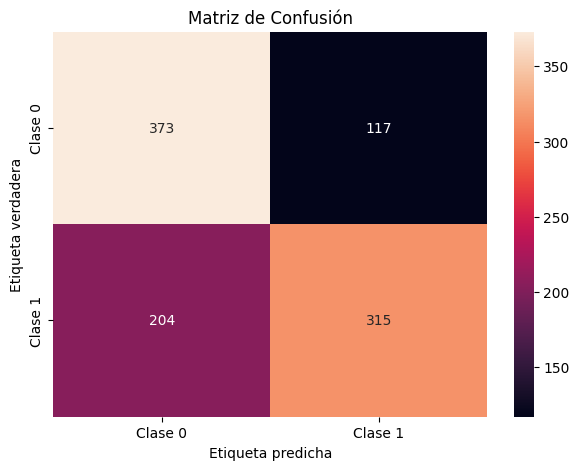

In [ ]:
# Generamos clasificador con k = 2
clasificadorKNN2 = generate_clf_KNN(7,X_train_knn, y_train_knn)

# Targets predecidos por el modelo (y_pred) con los datos de testeos cargados (x_test)
y_pred_knn = clasificadorKNN2.predict(X_test_knn)

# Creamos la matriz de confusion, allí con los datos reales y los que predijo el modelo
c = confusion_matrix(y_test_knn, y_pred_knn)

# Graficamos la matriz de confusion
plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
def plot_knn_metrics(X, y, clf_KNN, metric='accuracy', k_range=range(1, 35), test_size=0.5, average='macro'):

    metrics_functions = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1': f1_score
    }

    if metric not in metrics_functions:
        raise ValueError(f"Métrica '{metric}' no reconocida. Elige entre: {', '.join(metrics_functions.keys())}.")

    if metric in ['precision', 'recall', 'f1']:
        metric_function = lambda y_true, y_pred: metrics_functions[metric](y_true, y_pred, average=average)
    else:
        metric_function = metrics_functions[metric]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    train_scores = []
    test_scores = []

    for k in k_range:
        knn = clf_KNN(n_neighbors=k)
        knn.fit(X_train, y_train.ravel())

        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)

        train_scores.append(metric_function(y_train, y_train_pred))
        test_scores.append(metric_function(y_test, y_test_pred))

    plt.figure(figsize=(35, 10))
    plt.plot(k_range, train_scores, label=f'Training {metric.capitalize()}')
    plt.plot(k_range, test_scores, label=f'Testing {metric.capitalize()}')

    plt.legend()
    plt.title(f'{metric.capitalize()} vs. Número de Vecinos')
    plt.xlabel('Número de Vecinos (k)')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.xticks(k_range)
    plt.tight_layout()
    plt.show()


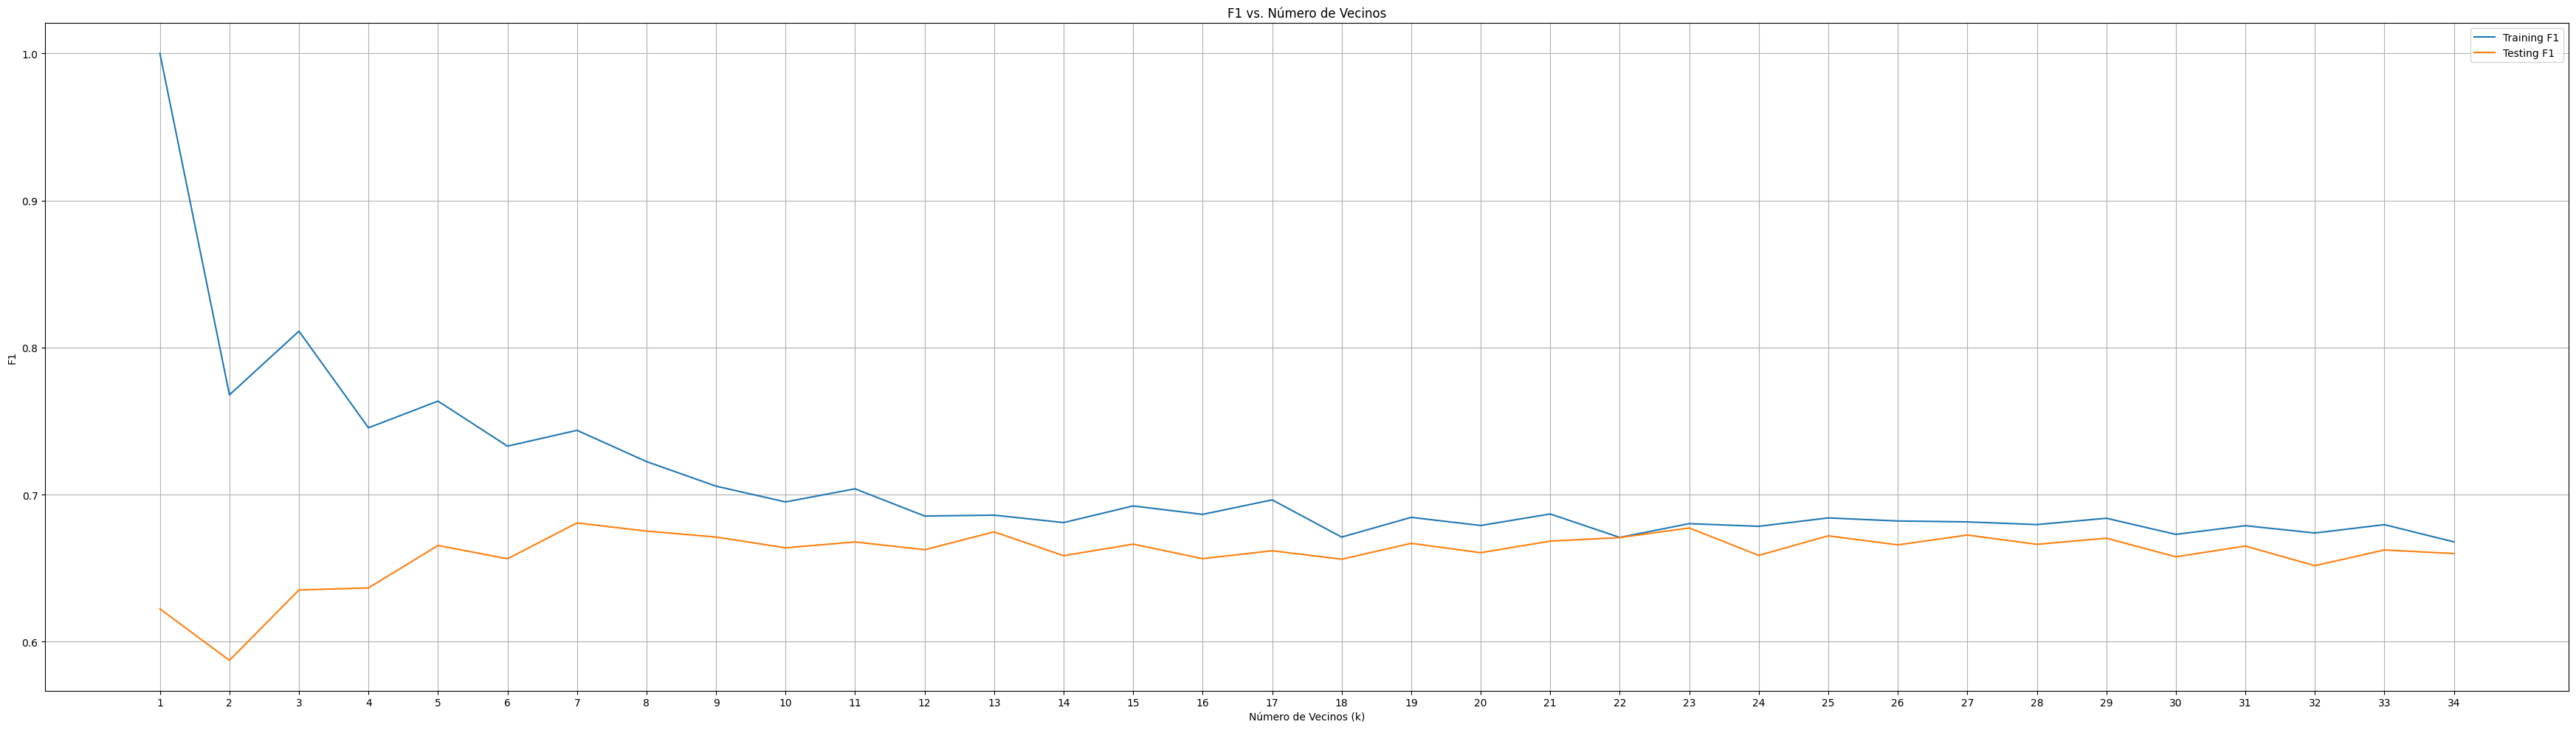

In [ ]:
# f1
X= df[['acousticness','danceability','energy','instrumentalness','loudness','speechiness']].to_numpy()
y= df[['target']].to_numpy()
plot_knn_metrics(X, y, KNeighborsClassifier, 'f1',test_size=0.5)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

scores = cross_val_score(knn, X, y.ravel(), cv=7)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.60207612 0.57638889 0.57986111 0.46875    0.59375    0.57638889
 0.57291667]
Media de los scores: 0.5671616685890042
Desviación estándar de los scores: 0.041361635347154486


In [ ]:
cv = KFold(n_splits=7, shuffle=True, random_state=48)

scores = cross_val_score(knn, X, y.ravel(), cv=cv)  # ACA PORQUE USAS X e Y EN LUGAR DE LOS QUE PARTICIONASTE CON LA FUNCION train_test_split. creo que tenemos que determinar tambien si el test_size es apropiado, podriamos usar 0.3, 0.4 o 0.5.

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.57439446 0.60416667 0.58333333 0.60069444 0.625      0.63888889
 0.66666667]
Media de los scores: 0.6133063519525457
Desviación estándar de los scores: 0.029984857464811786


# SVM (SupportVectorMachines)

## Desarrollo del modelo

Support Vector Machines tiene los siguientes hiperparametros
  - Tipo Kernel (linear, rbf)
  - Valor de gamma
  - Valor de C

In [ ]:
'''
acousticness	danceability	duration_ms	energy	instrumentalness	key	liveness	loudness	mode	speechiness	tempo	time_signature	valence
'''

# Selecciono mis variables para generar el modelo
X_pred = df[['acousticness','danceability', 'energy',	'instrumentalness',	'speechiness', 'loudness']]

# Selecciono el target (gusta=1, no_gusta=0)
y_pred=df[['target']]

# Genero las particiones de los datos de prueba, los target para la prueba, el tamanio de la procion de prueba y el valor de la seed
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_pred, y_pred, test_size=0.45, random_state=50)

# En arreglo de parametros que se van a pasar al modelo para entrenar
parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10 ], 'gamma': [0.1, 1, 10]}

# Genero el objeto SVC
svc = SVC()

# No estoy seguro porque en la clase de uso f1_macro, pero cambiando por accuracy da el mismo valor...

'''
    accuracy:    La tasa de clasificación correcta.
    precision:   La proporción de verdaderos positivos entre los verdaderos positivos y falsos positivos.
    recall:      La proporción de verdaderos positivos entre los verdaderos positivos y falsos negativos.
    f1:          La puntuación F1, que es una media armónica de precisión y recall.
'''
# Elijo algunos scoring para hacer las pruebas
scorings = ['accuracy', 'precision', 'recall', 'f1', 'f1_macro']

for scr_param in scorings:
  clf = GridSearchCV(svc, parameters, scoring=scr_param)

  # Entreno con los parametros
  clf.fit(X_train_svm, y_train_svm.values.ravel())

  # Selecciono los parametros que ajustan mejor
  print(f"Mejores parámetros con {scr_param} :\t", clf.best_params_, "\tscore: ", round(clf.best_score_,4))

Mejores parámetros con accuracy :	 {'C': 10, 'gamma': 1, 'kernel': 'rbf'} 	score:  0.7124
Mejores parámetros con precision :	 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 	score:  0.7461
Mejores parámetros con recall :	 {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'} 	score:  0.8334
Mejores parámetros con f1 :	 {'C': 10, 'gamma': 1, 'kernel': 'rbf'} 	score:  0.6996
Mejores parámetros con f1_macro :	 {'C': 10, 'gamma': 1, 'kernel': 'rbf'} 	score:  0.7115


Ejecutando lo anterior, si bien con 'recall' se obtiene una presicion del 83.3% con C:01 y gamma:10, el resto de los scoring devuelven C:10 y gamma:1

Para todos los casos el Kernel 'rbf' es superior al 'lineal'.

Se probo con el Kernel 'poly' pero se colgo el programa, se ve que generaba mucha carga computacional y despues de 1h lo cancelamos.

Accuracy y f1_macro son las mas equilibradas/balanceadas.

## Validacion

## Evaluacion y analisis del modelo

### Matriz de confusion y (precision, sensibilidad y f1-score)

Reporte de Clasificación SVM:

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       452
           1       0.70      0.64      0.67       456

    accuracy                           0.68       908
   macro avg       0.68      0.68      0.68       908
weighted avg       0.68      0.68      0.68       908



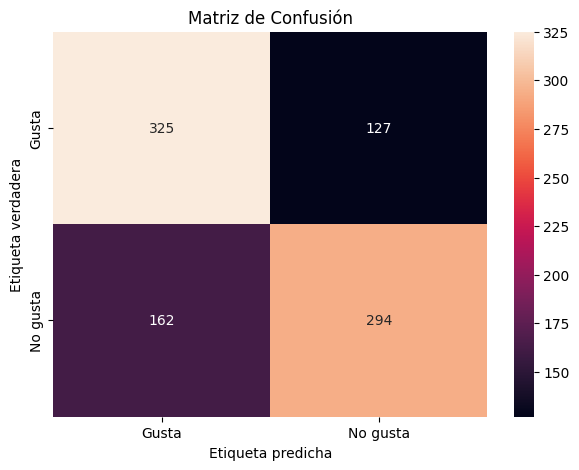

In [ ]:
# Con los parametros elegidos mas arriba y se entrena el modelo
svc_best = SVC(C=10, gamma=1, kernel='rbf')
svc_best.fit(X_train_svm, y_train_svm.values.ravel())

# Pruebo el modelo generado con la proporcion destinada para testearlo
y_pred_svm = svc_best.predict(X_test_svm)

# Rendimiento del modelo (precision, recall, F1-score con la funcion classification_report)
print("Reporte de Clasificación SVM:\n")
print(classification_report(y_test_svm, y_pred_svm))

# Rendimiento con la matriz confucion (grafico) comparando lo predicho con los reales.
c = confusion_matrix(y_test_svm.values, y_pred_svm)

# Se grafica
plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Gusta','No gusta'], yticklabels=['Gusta','No gusta'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

Validacion Cruzada k-fold

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC


svc = SVC()


param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}


grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_svm, y_train_svm.values.ravel())


print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)

Mejores parámetros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Mejor score: 0.71236802413273


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='f1_macro')
clf.fit(X_train_svm, y_train_svm.values.ravel())

print("Mejores parámetros:", clf.best_params_)

print("Mejor score:", clf.best_score_)

Mejores parámetros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Mejor score: 0.7115000502238876


# Naive Bayes


In [ ]:
# Se instancia el modelo Bayes y entrena
naive_bayes = GaussianNB()

# No funciona este Hiperparametro... No cambia nada
alpha =1
X_smoothed = X + alpha

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.50, random_state=50)

print(X)
print(X_smoothed)

naive_bayes.fit(X_train_nb, y_train_nb.ravel())
y_pred_nb = naive_bayes.predict(X_test_nb)

[[1.02000e-02 8.33000e-01 4.34000e-01 ... 4.31000e-01 1.50062e+02
  2.86000e-01]
 [1.99000e-01 7.43000e-01 3.59000e-01 ... 7.94000e-02 1.60083e+02
  5.88000e-01]
 [3.44000e-02 8.38000e-01 4.12000e-01 ... 2.89000e-01 7.50440e+01
  1.73000e-01]
 ...
 [8.57000e-03 6.37000e-01 9.35000e-01 ... 1.07000e-01 1.50082e+02
  4.70000e-01]
 [1.64000e-03 5.57000e-01 9.92000e-01 ... 1.33000e-01 1.50011e+02
  6.23000e-01]
 [2.81000e-03 4.46000e-01 9.15000e-01 ... 1.41000e-01 1.90013e+02
  4.02000e-01]]
[[  1.0102    1.833     1.434   ...   1.431   151.062     1.286  ]
 [  1.199     1.743     1.359   ...   1.0794  161.083     1.588  ]
 [  1.0344    1.838     1.412   ...   1.289    76.044     1.173  ]
 ...
 [  1.00857   1.637     1.935   ...   1.107   151.082     1.47   ]
 [  1.00164   1.557     1.992   ...   1.133   151.011     1.623  ]
 [  1.00281   1.446     1.915   ...   1.141   191.013     1.402  ]]


Reporte de Clasificación Bayes:

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       505
           1       0.65      0.59      0.62       504

    accuracy                           0.64      1009
   macro avg       0.64      0.64      0.64      1009
weighted avg       0.64      0.64      0.64      1009



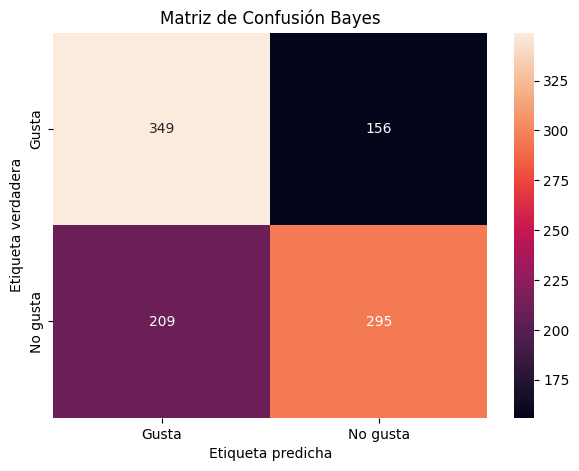

In [ ]:
print("Reporte de Clasificación Bayes:\n")
print(classification_report(y_test_nb, y_pred_nb))

# Rendimiento con la matriz confucion (grafico) comparando lo predicho con los reales.
c = confusion_matrix(y_test_nb, y_pred_nb)

# Se grafica
plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Gusta','No gusta'], yticklabels=['Gusta','No gusta'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión Bayes')
plt.show()

Validación

In [ ]:
scores = cross_val_score(clf, y_test_nb, y_pred_nb, cv=5)  # Aquí cv=5 indica que se realizará una validación cruzada de 5 pliegues

# Imprimimos los puntajes obtenidos en cada pliegue
print("Puntajes de validación cruzada: ", scores)

# Imprimimos la precisión media y la desviación estándar de los puntajes de validación cruzada
print(f"Precisión media: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

Puntajes de validación cruzada:  [0.61767815 0.63236596 0.64300442 0.63839231 0.65394116]
Precisión media: 0.64 (+/- 0.01)


# Tree Decision

In [ ]:
# Se instancia el modelo Tree y entrena

decision_tree = DecisionTreeClassifier(random_state=42)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=0.45, random_state=50)

decision_tree.fit(X_train_t, y_train_t)
y_pred_dt = decision_tree.predict(X_test_t)

Reporte de Clasificación Decision Tree:

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       452
           1       0.69      0.72      0.70       456

    accuracy                           0.70       908
   macro avg       0.70      0.70      0.70       908
weighted avg       0.70      0.70      0.70       908



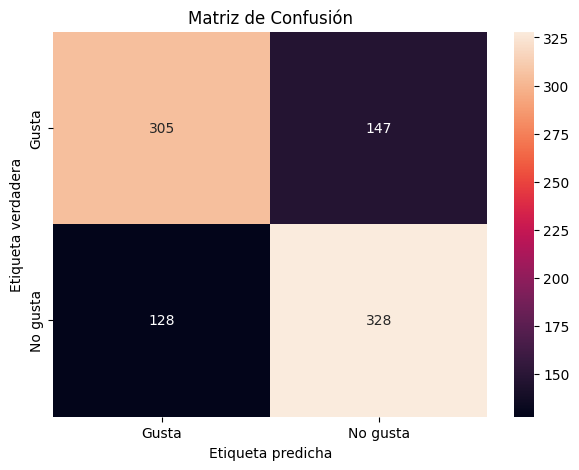

In [ ]:
print("Reporte de Clasificación Decision Tree:\n")
print(classification_report(y_test_t, y_pred_dt))

# Rendimiento con la matriz confucion (grafico) comparando lo predicho con los reales.
c = confusion_matrix(y_test_t, y_pred_dt)

# Se grafica
plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Gusta','No gusta'], yticklabels=['Gusta','No gusta'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

Validacion

In [ ]:

# Realizamos la validación cruzada en el conjunto de entrenamiento
scores = cross_val_score(clf, y_test_t, y_pred_dt, cv=5)  # Aquí cv=5 indica que se realizará una validación cruzada de 5 pliegues

# Imprimimos los puntajes obtenidos en cada pliegue
print("Puntajes de validación cruzada: ", scores)

# Imprimimos la precisión media y la desviación estándar de los puntajes de validación cruzada
print(f"Precisión media: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

Puntajes de validación cruzada:  [0.7464874  0.68657663 0.64728682 0.68446646 0.71823204]
Precisión media: 0.70 (+/- 0.03)


# Otro metodo (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
for size in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=42)
  random_forest = RandomForestClassifier(n_estimators=500, random_state=42)
  random_forest.fit(X_train, y_train.ravel())

  y_pred = random_forest.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print('\n---------------------------------------------------------------------------------')
  print(f'test_size: {size} ')
  print(f'Accuracy: {accuracy}')

  # Otras métricas como la matriz de confusión y el informe de clasificación
  confusion_mat = confusion_matrix(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred)

  print(f'Confusion Matrix:\n{confusion_mat}')
  print(f'Classification Report:\n{classification_rep}')


# Como se observa que es inelastico el efecto del test_size en la precision. Elijo 0.3 arbritrariamente y evaluo el n_estimator.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

n_estimators = [100, 200, 500, 1000]

for n in n_estimators:
  random_forest = RandomForestClassifier(n_estimators = n, random_state=42)
  random_forest.fit(X_train, y_train.ravel())

  y_pred = random_forest.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print('\n---------------------------------------------------------------------------------')
  print(f'n_estimators: {n} ')
  print(f'Accuracy: {accuracy}')

  # Otras métricas como la matriz de confusión y el informe de clasificación
  confusion_mat = confusion_matrix(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred)

  print(f'Confusion Matrix:\n{confusion_mat}')
  print(f'Classification Report:\n{classification_rep}')

# De la misma forma la precision no cambia con n_estimators, converge al 0.7392.

In [ ]:
# n_estimators es el hiperparametro a controlar
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = 0.3, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_rf, y_train_rf.ravel())

y_pred_rf = random_forest.predict(X_test_rf)

Accuracy: 0.764026402640264
Confusion Matrix Random Forest:
[[232  64]
 [ 79 231]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       296
           1       0.78      0.75      0.76       310

    accuracy                           0.76       606
   macro avg       0.76      0.76      0.76       606
weighted avg       0.76      0.76      0.76       606





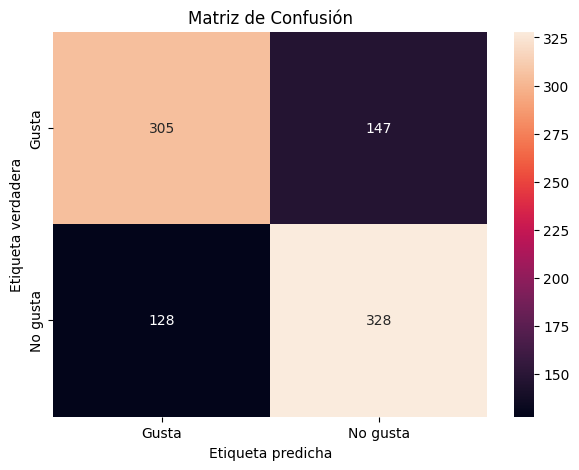

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Otras métricas como la matriz de confusión y el informe de clasificación
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Confusion Matrix Random Forest:\n{confusion_mat}')
print(f'Classification Report:\n{classification_rep}')
print('\n')

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Gusta','No gusta'], yticklabels=['Gusta','No gusta'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

Validación

In [ ]:
# Realizamos la validación cruzada en el conjunto de entrenamiento
scores = cross_val_score(clf, y_test, y_pred, cv=5)  # Aquí cv=5 indica que se realizará una validación cruzada de 5 pliegues

# Imprimimos los puntajes obtenidos en cada pliegue
print("Puntajes de validación cruzada: ", scores)

# Imprimimos la precisión media y la desviación estándar de los puntajes de validación cruzada
print(f"Precisión media: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

Puntajes de validación cruzada:  [0.79440512 0.79333197 0.71883543 0.73244887 0.77679852]
Precisión media: 0.76 (+/- 0.03)


# Ensamble metodos

knn:0, svm:1, nb:1, dt:1, rf:0
Votes {0: 2, 1: 3}
Majority vote: 1
Real Y value: [1]


knn:1, svm:0, nb:0, dt:0, rf:1
Votes {0: 3, 1: 2}
Majority vote: 0
Real Y value: [1]


knn:1, svm:0, nb:0, dt:1, rf:1
Votes {0: 2, 1: 3}
Majority vote: 1
Real Y value: [1]


knn:0, svm:1, nb:1, dt:0, rf:0
Votes {0: 3, 1: 2}
Majority vote: 0
Real Y value: [1]


knn:1, svm:1, nb:1, dt:0, rf:0
Votes {0: 2, 1: 3}
Majority vote: 1
Real Y value: [1]


knn:0, svm:0, nb:0, dt:0, rf:0
Votes {0: 5, 1: 0}
Majority vote: 0
Real Y value: [1]


knn:0, svm:1, nb:0, dt:1, rf:0
Votes {0: 3, 1: 2}
Majority vote: 0
Real Y value: [1]


knn:1, svm:1, nb:0, dt:0, rf:1
Votes {0: 2, 1: 3}
Majority vote: 1
Real Y value: [1]


knn:0, svm:1, nb:0, dt:0, rf:0
Votes {0: 4, 1: 1}
Majority vote: 0
Real Y value: [1]


knn:0, svm:0, nb:0, dt:1, rf:1
Votes {0: 3, 1: 2}
Majority vote: 0
Real Y value: [1]


knn:1, svm:1, nb:1, dt:1, rf:1
Votes {0: 0, 1: 5}
Majority vote: 1
Real Y value: [1]




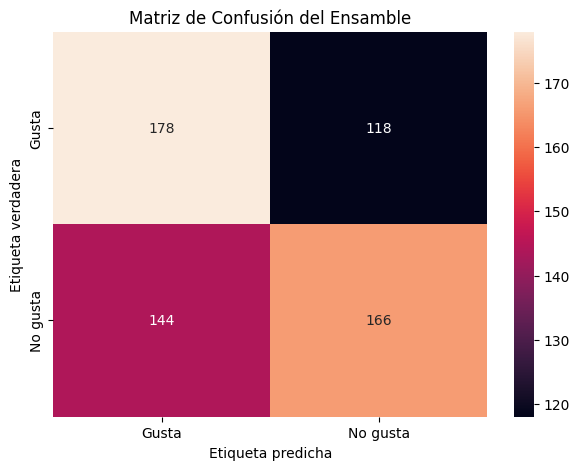

Accuracy: 0.764026402640264
Confusion Matrix:
[[232  64]
 [ 79 231]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       296
           1       0.78      0.75      0.76       310

    accuracy                           0.76       606
   macro avg       0.76      0.76      0.76       606
weighted avg       0.76      0.76      0.76       606





In [ ]:
final_predictions = []
contador = 0
for knn, svm, nb, dt, rf , y_real in zip(y_pred_knn, y_pred_svm, y_pred_nb, y_pred_dt, y_pred_rf, y):


  votes = {0: 0, 1: 0}
  votes[knn] += 1
  votes[svm] += 1
  votes[nb] += 1
  votes[dt] += 1
  votes[rf] += 1


  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

  if contador < 11:
    contador += 1
    print(f"knn:{knn}, svm:{svm}, nb:{nb}, dt:{dt}, rf:{rf}")
    print(f"Votes {votes}")
    print(f"Majority vote: {majority_vote}")
    print(f'Real Y value: {y_real.ravel()}')
    print("\n")
c = confusion_matrix(y_test, final_predictions)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Gusta','No gusta'], yticklabels=['Gusta','No gusta'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del Ensamble')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')
print(f'Classification Report:\n{classification_rep}')
print('\n')